In [1]:
#!pip install --no-deps yampit

In [2]:
#!pip install easygems

## Polytope Climate-DT example notebook

This notebook shows how to use earthkit-data and earthkit-maps to pull destination-earth data from LUMI and plot it using earthkit-maps.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py -u <user_name> -p <password>

This will generate a token that can then be used by earthkit and polytope.

You can also run the script without arguments to enter your username and password.

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-maps
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)
* pip install easygems
* pip install --no-deps yampit

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

# Define the storyline surface variables dataset
#### see https://confluence.ecmwf.int/display/DDCZ/Climate%20DT%20overview

In [97]:
experiment = 'hist' # 'hist', 'cont', 'Tplus2.0K'
resolution = 'high' # 'standard', 'high'

In [98]:
import xarray as xr
import zarr
from yampit import Mapper, PolytopeRequestHandler

# define a mapper to polytope
mapper = Mapper(
    request_handler=PolytopeRequestHandler(
        "polytope.lumi.apps.dte.destination-earth.eu",
        "destination-earth",
    ),
    base_request={
        'activity': 'story-nudging',
        'class': 'd1',
        'dataset': 'climate-dt',
        'experiment': experiment,
        'generation': '1',
        'levtype': 'sfc',
        'realization': '1',
        'resolution': resolution,
        'stream': 'clte',
        'type': 'fc',
    },
    coords={
        "time": xr.date_range("2017-01-01", "2023-12-31", freq="h"),
        "cell": range(3 * 4**10),
        "model": ["IFS-FESOM"],
    },
    variables={
        "tclw": {"dims": ("model", "time", "cell")},
        "tciw": {"dims": ("model", "time", "cell")},  
        "tcwv": {"dims": ("model", "time", "cell")},
        "msl": {"dims": ("model", "time", "cell")},
        "sp": {"dims": ("model", "time", "cell")},
        "10u": {"dims": ("model", "time", "cell")},
        "10v": {"dims": ("model", "time", "cell")},
        #"t": {"dims": ("model", "time", "cell")},
        "2t": {"dims": ("model", "time", "cell")},
        "2d": {"dims": ("model", "time", "cell")},
        "skt": {"dims": ("model", "time", "cell")},
        "tcc": {"dims": ("model", "time", "cell")},
        "tp": {"dims": ("model", "time", "cell")},
        "sshf": {"dims": ("model", "time", "cell")},
        "slhf": {"dims": ("model", "time", "cell")},
        "ssrd": {"dims": ("model", "time", "cell")},
        "strd": {"dims": ("model", "time", "cell")},
        "ssr": {"dims": ("model", "time", "cell")},
        "str": {"dims": ("model", "time", "cell")},
        "tsr": {"dims": ("model", "time", "cell")},
        "ttr": {"dims": ("model", "time", "cell")},
        #"etsssr": {"dims": ("model", "time", "cell")},
        #"ntsssr": {"dims": ("model", "time", "cell")},
    },
    internal_dims=["cell"],
)

ds = xr.open_dataset(zarr.KVStore(mapper), engine='zarr')
ds

<xarray.Dataset> Size: 15TB
Dimensions:  (model: 1, time: 61321, cell: 3145728)
Coordinates:
  * cell     (cell) int64 25MB 0 1 2 3 4 ... 3145724 3145725 3145726 3145727
  * model    (model) <U9 36B 'IFS-FESOM'
  * time     (time) datetime64[ns] 491kB 2017-01-01 ... 2023-12-31
Data variables: (12/20)
    10u      (model, time, cell) float32 772GB ...
    10v      (model, time, cell) float32 772GB ...
    2d       (model, time, cell) float32 772GB ...
    2t       (model, time, cell) float32 772GB ...
    msl      (model, time, cell) float32 772GB ...
    skt      (model, time, cell) float32 772GB ...
    ...       ...
    tciw     (model, time, cell) float32 772GB ...
    tclw     (model, time, cell) float32 772GB ...
    tcwv     (model, time, cell) float32 772GB ...
    tp       (model, time, cell) float32 772GB ...
    tsr      (model, time, cell) float32 772GB ...
    ttr      (model, time, cell) float32 772GB ...

# Plot it

In [99]:
import easygems.healpix as egh
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

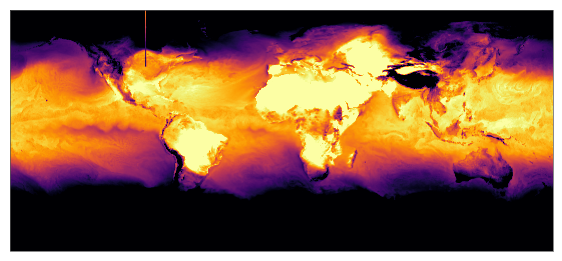

In [100]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -80, 80], crs=ccrs.PlateCarree()) # global
#ax.set_extent([-10, 25, 35, 60], crs=ccrs.PlateCarree()) # region

egh.healpix_show(ds["2t"].sel(model="IFS-FESOM", time="2021-08-20T15:00"), vmin=273+10., vmax=273+30., cmap="inferno")

<Figure size 700x600 with 0 Axes>

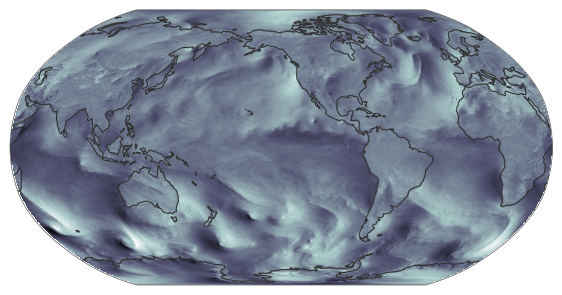

In [101]:
egh.healpix_show(ds["10v"].sel(model="IFS-FESOM", time="2021-07-14T15:00"), cmap="bone_r")

<Figure size 700x600 with 0 Axes>

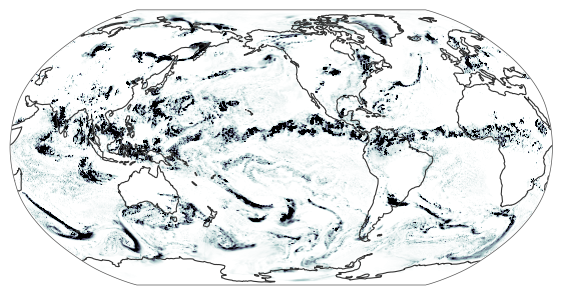

In [102]:
egh.healpix_show(ds["tp"].sel(model="IFS-FESOM", time="2021-07-14T15:00"), vmin=0, vmax=0.001, cmap="bone_r") 

<Figure size 700x600 with 0 Axes>

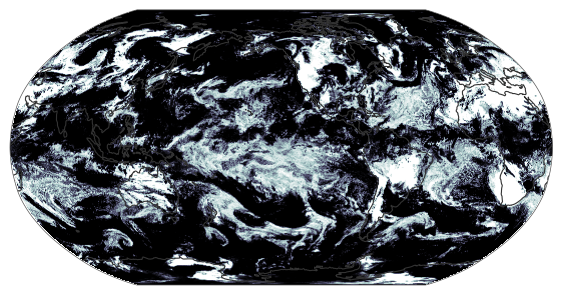

In [104]:
egh.healpix_show(ds["tcc"].sel(model="IFS-FESOM", time="2021-07-14T15:00"), cmap="bone_r")

<Figure size 700x600 with 0 Axes>

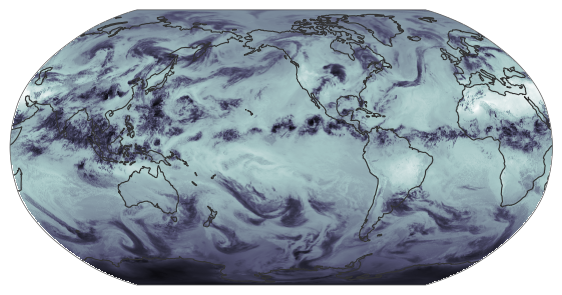

In [105]:
egh.healpix_show(ds["ttr"].sel(model="IFS-FESOM", time="2021-07-14T15:00"), cmap="bone_r")

<Figure size 700x600 with 0 Axes>

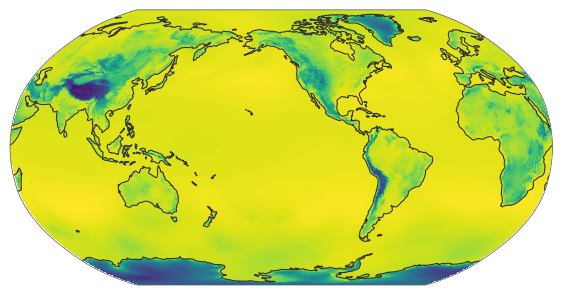

In [106]:
egh.healpix_show(ds["sp"].sel(model="IFS-FESOM", time="2021-07-14T15:00"))

# Plot 'climate change of the day' (hist - cont)

In [107]:
experiment = 'cont'

In [108]:
# define a mapper to polytope
mapper = Mapper(
    request_handler=PolytopeRequestHandler(
        "polytope.lumi.apps.dte.destination-earth.eu",
        "destination-earth",
    ),
    base_request={
        'activity': 'story-nudging',
        'class': 'd1',
        'dataset': 'climate-dt',
        'experiment': experiment,
        'generation': '1',
        'levtype': 'sfc',
        'realization': '1',
        'resolution': resolution,
        'stream': 'clte',
        'type': 'fc',
    },
    coords={
        "time": xr.date_range("2017-01-01", "2023-12-31", freq="h"),
        "cell": range(3 * 4**10),
        "model": ["IFS-FESOM"],
    },
    variables={
        "tclw": {"dims": ("model", "time", "cell")},
        "tciw": {"dims": ("model", "time", "cell")},  
        "tcwv": {"dims": ("model", "time", "cell")},
        "msl": {"dims": ("model", "time", "cell")},
        "sp": {"dims": ("model", "time", "cell")},
        "10u": {"dims": ("model", "time", "cell")},
        "10v": {"dims": ("model", "time", "cell")},
        #"t": {"dims": ("model", "time", "cell")},
        "2t": {"dims": ("model", "time", "cell")},
        "2d": {"dims": ("model", "time", "cell")},
        "skt": {"dims": ("model", "time", "cell")},
        "tcc": {"dims": ("model", "time", "cell")},
        "tp": {"dims": ("model", "time", "cell")},
        "sshf": {"dims": ("model", "time", "cell")},
        "slhf": {"dims": ("model", "time", "cell")},
        "ssrd": {"dims": ("model", "time", "cell")},
        "strd": {"dims": ("model", "time", "cell")},
        "ssr": {"dims": ("model", "time", "cell")},
        "str": {"dims": ("model", "time", "cell")},
        "tsr": {"dims": ("model", "time", "cell")},
        "ttr": {"dims": ("model", "time", "cell")},
        #"etsssr": {"dims": ("model", "time", "cell")},
        #"ntsssr": {"dims": ("model", "time", "cell")},
    },
    internal_dims=["cell"],
)

ds2 = xr.open_dataset(zarr.KVStore(mapper), engine='zarr')
ds2

<xarray.Dataset> Size: 15TB
Dimensions:  (model: 1, time: 61321, cell: 3145728)
Coordinates:
  * cell     (cell) int64 25MB 0 1 2 3 4 ... 3145724 3145725 3145726 3145727
  * model    (model) <U9 36B 'IFS-FESOM'
  * time     (time) datetime64[ns] 491kB 2017-01-01 ... 2023-12-31
Data variables: (12/20)
    10u      (model, time, cell) float32 772GB ...
    10v      (model, time, cell) float32 772GB ...
    2d       (model, time, cell) float32 772GB ...
    2t       (model, time, cell) float32 772GB ...
    msl      (model, time, cell) float32 772GB ...
    skt      (model, time, cell) float32 772GB ...
    ...       ...
    tciw     (model, time, cell) float32 772GB ...
    tclw     (model, time, cell) float32 772GB ...
    tcwv     (model, time, cell) float32 772GB ...
    tp       (model, time, cell) float32 772GB ...
    tsr      (model, time, cell) float32 772GB ...
    ttr      (model, time, cell) float32 772GB ...

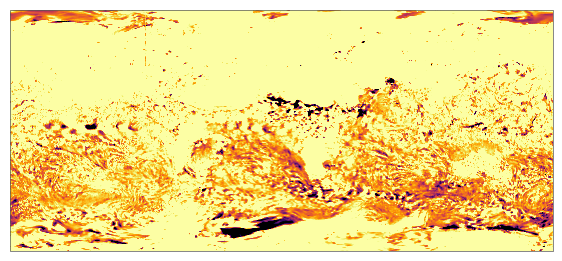

In [110]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -80, 80], crs=ccrs.PlateCarree()) # global
#ax.set_extent([-10, 25, 35, 60], crs=ccrs.PlateCarree()) # region

egh.healpix_show(ds["2t"].sel(model="IFS-FESOM", time="2021-08-20T15:00") - ds2["2t"].sel(model="IFS-FESOM", time="2021-08-20T15:00"), vmin=-1., vmax=1., cmap="inferno")

<Figure size 700x600 with 0 Axes>

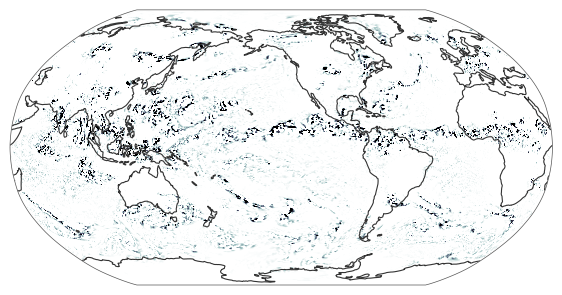

In [111]:
egh.healpix_show(ds["tp"].sel(model="IFS-FESOM", time="2021-07-14T15:00") - ds2["tp"].sel(model="IFS-FESOM", time="2021-07-14T15:00"), vmin=0, vmax=0.001, cmap="bone_r") 